# Исследование объявлений о продаже квартир

На основе данных сервиса Яндекс.Недвижимость определена рыночная стоимость
объектов недвижимости разного типа, типичные параметры квартир, в зависимости от
удаленности от центра. Проведена предобработка данных. Добавлены новые данные.
Построены гистограммы, боксплоты, диаграммы рассеивания.  

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Для дотижения целей исследования необходимо определить основополагающие факторы, влияющие на полною стоимость квартиры и одного квадратного метра.

- Обрабатываем данные, по-максимуму избавляемся от пропусков, дубликатов и аномальных значений.
- Делаем расчёты необходимых для целей исследования параметров и добавляем в таблицу цену за 1м2 площади, день, месяц и год публикации объявления.
- Изучаем общие параметры объектов для создания примера самого распостраненного объявления
- Оцениваем и изучаем скорость продажи.
- Ищем зависимости полной стоимости объекта от площадей, даты подачи объявления и типа этажа.
- Оцениваем стоимость одного квадратного метра и изучаем топ-10 населенных пунктов по количеству обоъявлений
- Оцениваем стоимость квартир по удаленности от центра.

### Открываем файл с данными и изучаем общую информацию. 

#### Знакомство с данными

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Общий вид таблицы

In [3]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Гистограмма датасета

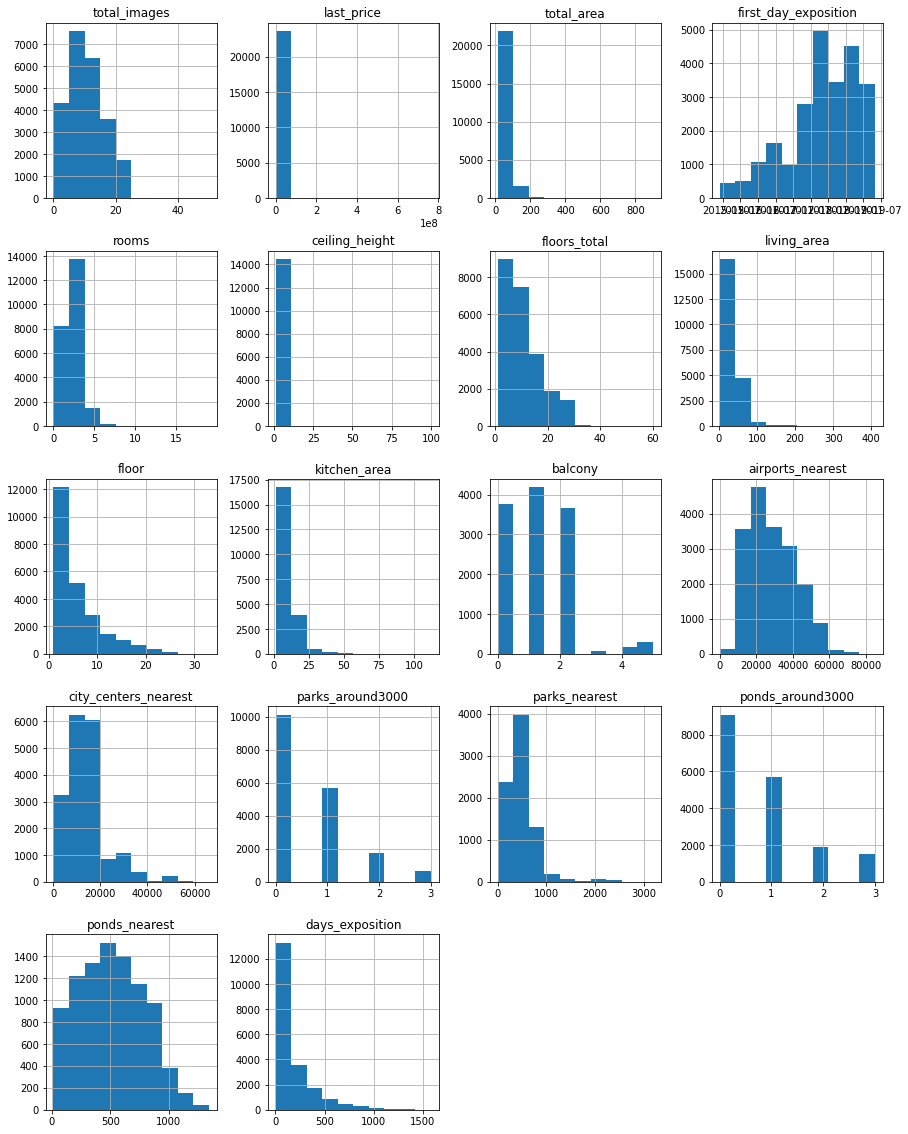

In [4]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
data.hist(figsize=(15, 20));

### Обработка пропусков, дубликатов и аномалий

#### Пропуски:
1. ceiling_height (заменяем медианой)
2. floors_total (пропусков немного, не трогаем)
3. living_area (заполнить медианой по количеству комнат)
4. is_appartment (заменить пропущенные значения на 0)
5. kitchen_area (заменить медианой по количеству комнат)
6. balcony (заменить пропуски на ноль)
7. locality_name (пропусков немного, заменить на "неизвестно")
8. airports_nearest (заменить медианой по населенному пункту)
9. cityCenters_nearest (заменить медианой по населенному пункту) (и переименовать)
10. parks_around3000, parks_nearest, ponds_around3000, ponds_nearest (заменить медианой по населенному пункту)
11. days_exposition (заменить меданой по населенному пункту)

#### Дубликаты
1. Избавиться от буквы "ё" и привести все ПГТ к одному названию.

#### Выбросы:
1. Оставить более-менее привычные квартиры, укладывающиеся в обывательское представление о недвижимости. Отбросить отдельные элитные экземпляры.

In [5]:
# check
# пропущенные значения бары
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'percent'})
            .query('percent > 0')
            .sort_values(by = 'percent', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Процент пропусков' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

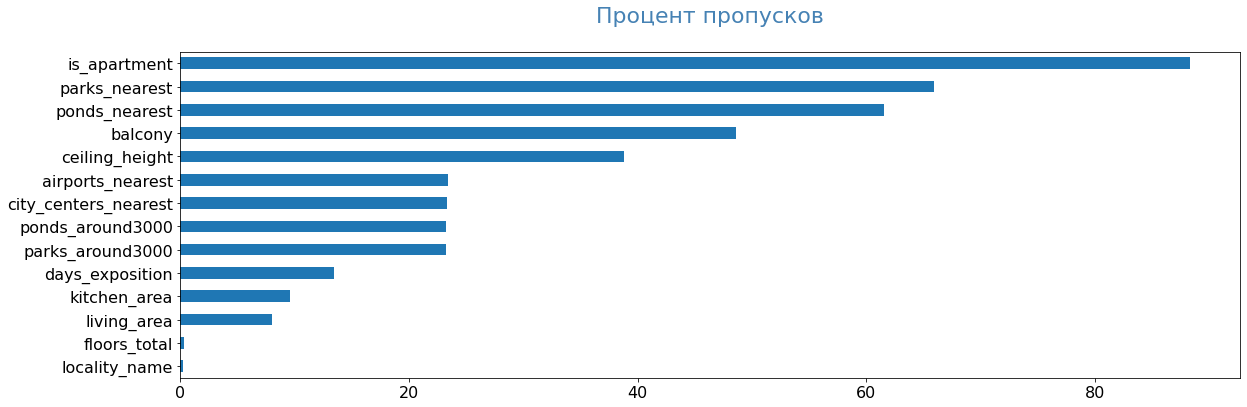

In [6]:
pass_value_barh(data)

In [7]:
#Заполняем пропуски в данных и смотрим заполненную таблицу.
#data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#data['living_area'] = data['living_area'].fillna((data['total_area'] * 0.9) - data['kitchen_area'])
data['is_apartment'] = data['is_apartment'].fillna(False).astype(bool)
#data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform('median'))
data['balcony'] = data['balcony'].fillna(False).astype(bool)
data['locality_name'] = data['locality_name'].fillna('Неизвестно')
data = data.dropna(subset=['floors_total'])
data['floors_total'] = data['floors_total'].astype('int')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

In [8]:
data['areas_not_ok'] = (data['total_area'] * 0.9) < (data['living_area'] + data['kitchen_area'])
data.groupby('areas_not_ok')['rooms'].count()

areas_not_ok
False    23152
True       461
Name: rooms, dtype: int64

In [9]:
data = data.query('areas_not_ok == False')

In [10]:
#Заполняем геоданные по населенному пункту медианой. Не уверен, что это хорошая идея, пока на холде.
#data['airports_nearest'] = data.groupby('locality_name')['airports_nearest'].transform('median')
#data['city_centers_nearest'] = data.groupby('locality_name')['city_centers_nearest'].transform('median')
#data['parks_around3000'] = data.groupby('locality_name')['parks_around3000'].transform('median')
#data['parks_nearest'] = data.groupby('locality_name')['parks_nearest'].transform('median')
#data['ponds_around3000'] = data.groupby('locality_name')['ponds_around3000'].transform('median')
#data['ponds_nearest'] = data.groupby('locality_name')['ponds_nearest'].transform('median')
#data['days_exposition'] = data.groupby('locality_name')['days_exposition'].transform('median')
#data = data.dropna()
#data.info()

In [11]:
#Приводим названия к более-менее единому виду. Проводим визуальную оценку повторяющихся значений.
#data.duplicated().sum()
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
#sorted(data['locality_name'].unique())

In [12]:
# check 
data['locality_name'].nunique()

322

In [13]:
#Не нужна эта функция в исследовании, но раз уж работает - исправим данные в колонке "студия".
#def is_studio(row):
    #if row['rooms'] == 0:
        #return True
#data['studio'] = data.apply(is_studio, axis=1)    

#def is_apartment(row):
    #if row['rooms'] == 0:
        #return True
#data['is_apartment'] = data.apply(is_apartment, axis=1)   

In [14]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,25.70,2.50,4.00,"1,025,100.00",13.00,5.00,1.00,2.00
0.5,2.00,52.00,2.65,95.00,"4,600,000.00",30.00,9.00,4.00,9.00
0.9,3.00,93.10,3.05,460.00,"10,827,726.00",54.30,15.50,13.00,22.00
0.976,4.00,150.00,3.50,857.66,"22,764,564.29",86.63,25.00,20.00,25.00


In [15]:
# check 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23152 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23152 non-null  int64         
 1   last_price            23152 non-null  float64       
 2   total_area            23152 non-null  float64       
 3   first_day_exposition  23152 non-null  datetime64[ns]
 4   rooms                 23152 non-null  int64         
 5   ceiling_height        14197 non-null  float64       
 6   floors_total          23152 non-null  int64         
 7   living_area           21282 non-null  float64       
 8   floor                 23152 non-null  int64         
 9   is_apartment          23152 non-null  bool          
 10  studio                23152 non-null  bool          
 11  open_plan             23152 non-null  bool          
 12  kitchen_area          20921 non-null  float64       
 13  balcony         

In [16]:
#Оцениваем значения по столбцам. Посмотреть максимумы и минимумы, убрать сильно выделяющиеся значения.
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23152.000000,2.315200e+04,23152.000000,23152.000000,14197.000000,23152.000000,21282.000000,23152.000000,20921.000000,17746.000000,17769.000000,17770.000000,7874.000000,17770.000000,8883.000000,20057.000000
mean,9.860919,6.509259e+06,60.215182,2.066344,2.760435,10.698773,34.145324,5.887180,10.461912,28813.489462,14233.375429,0.607991,491.002286,0.767811,518.413374,181.052849
std,5.677244,1.089678e+07,35.503758,1.077092,0.933665,6.589500,21.653631,4.871398,5.646263,12649.448383,8620.858360,0.799406,341.522754,0.937041,277.889385,219.843306
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.407500e+06,40.000000,1.000000,2.510000,5.000000,18.500000,2.000000,7.000000,18557.000000,9289.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,26767.000000,13119.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.750000e+06,69.500000,3.000000,2.800000,16.000000,42.000000,8.000000,12.000000,37310.000000,16312.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,32.000000,60.000000,409.700000,33.000000,112.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [17]:
df = data.copy()

In [18]:
df
df = df.query('(500000 < last_price < 50000000 | last_price != last_price) & \
                  (living_area > 10 | living_area != living_area) & \
                  (4 < kitchen_area < 45 | kitchen_area != kitchen_area) & \
                  (2.5 <= ceiling_height < 5 | ceiling_height != ceiling_height) & \
                  (15 < total_area < 210 | total_area != total_area) & \
                  (rooms < 8 | rooms != rooms)  & \
                  (city_centers_nearest <= 40000 | city_centers_nearest != city_centers_nearest)')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22340 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22340 non-null  int64         
 1   last_price            22340 non-null  float64       
 2   total_area            22340 non-null  float64       
 3   first_day_exposition  22340 non-null  datetime64[ns]
 4   rooms                 22340 non-null  int64         
 5   ceiling_height        13624 non-null  float64       
 6   floors_total          22340 non-null  int64         
 7   living_area           20536 non-null  float64       
 8   floor                 22340 non-null  int64         
 9   is_apartment          22340 non-null  bool          
 10  studio                22340 non-null  bool          
 11  open_plan             22340 non-null  bool          
 12  kitchen_area          20205 non-null  float64       
 13  balcony         

In [19]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,340.00","22,340.00","13,624.00","19,381.00","22,340.00","20,536.00","20,205.00","22,340.00","22,340.00"
min,0.00,16.00,2.50,1.00,"520,000.00",10.08,4.10,1.00,1.00
max,7.00,207.00,4.80,"1,580.00","49,900,000.00",150.80,44.90,33.00,52.00


In [20]:
#Устраняем выбивающиеся значения

data = data.query('(500000 < last_price < 50000000 | last_price != last_price) & \
                  (living_area > 10 | living_area != living_area) & \
                  (4 < kitchen_area < 45 | kitchen_area != kitchen_area) & \
                  (2.5 < ceiling_height < 5 | ceiling_height != ceiling_height) & \
                  (15 < total_area < 210 | total_area != total_area) & \
                  (rooms < 8 | rooms != rooms)  & \
                  (city_centers_nearest <= 40000 | city_centers_nearest != city_centers_nearest)')

df = df.query('(500000 < last_price < 50000000 | last_price != last_price) & \
                  (living_area > 10 | living_area != living_area) & \
                  (4 < kitchen_area < 45 | kitchen_area != kitchen_area) & \
                  (2.5 <= ceiling_height < 5 | ceiling_height != ceiling_height) & \
                  (15 < total_area < 210 | total_area != total_area) & \
                  (rooms < 8 | rooms != rooms)  & \
                  (city_centers_nearest <= 40000 | city_centers_nearest != city_centers_nearest)')
data.info()
#Вот по итогу остаются чуть более половины данных, это Ок?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18987 entries, 0 to 23697
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18987 non-null  int64         
 1   last_price            18987 non-null  float64       
 2   total_area            18987 non-null  float64       
 3   first_day_exposition  18987 non-null  datetime64[ns]
 4   rooms                 18987 non-null  int64         
 5   ceiling_height        10271 non-null  float64       
 6   floors_total          18987 non-null  int64         
 7   living_area           17389 non-null  float64       
 8   floor                 18987 non-null  int64         
 9   is_apartment          18987 non-null  bool          
 10  studio                18987 non-null  bool          
 11  open_plan             18987 non-null  bool          
 12  kitchen_area          17060 non-null  float64       
 13  balcony         

In [21]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"18,987.00","18,987.00","10,271.00","16,619.00","18,987.00","17,389.00","17,060.00","18,987.00","18,987.00"
min,0.00,16.00,2.51,2.00,"520,000.00",10.08,4.10,1.00,1.00
max,7.00,207.00,4.80,"1,572.00","49,900,000.00",150.80,44.90,33.00,52.00


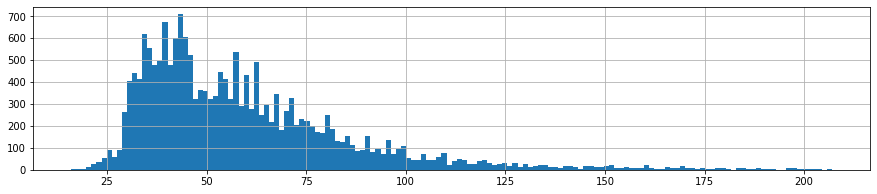

In [22]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

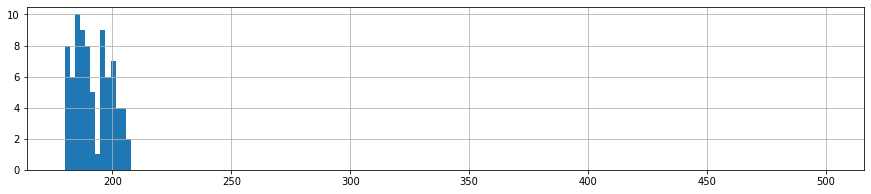

In [23]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

### Считаем и добавляем в таблицу новые столбцы

In [24]:
data['price_m2'] = data['last_price'] / data['total_area']
data['first_exposition_weekday'] = data['first_day_exposition'].dt.weekday
data['first_exposition_month'] = data['first_day_exposition'].dt.month

#month_lst = ["январь", "февраль", "март", "апрель", "мая", "июнь", "июль", "август", "сентябрь", "октябрь", "ноябрь", "декабрь"]
#def month_name(month):
 #   return month_lst[month - 1]
#data['first_exposition_month'] = data['first_exposition_month'].apply(month_name)
#data['first_exposition_month'] = data['first_exposition_month'].astype('category')
#data['first_exposition_month'] = data['first_exposition_month'].cat.set_categories(month_lst)
        
        
data['first_exposition_year'] = data['first_day_exposition'].dt.year

def apartment_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(apartment_type, axis=1)
data['to_city_center_km'] = (data['city_centers_nearest'] / 1000)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,areas_not_ok,price_m2,first_exposition_weekday,first_exposition_month,first_exposition_year,floor_type,to_city_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,False,120370.370370,3,3,2019,другой,16.028
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0.0,NaN,81.0,False,82920.792079,1,12,2018,первый,18.603
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,2.0,574.0,558.0,False,92785.714286,3,8,2015,другой,13.933
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,False,100000.000000,1,6,2018,другой,8.098
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,NaN,55.0,False,95065.789474,0,9,2018,другой,NaN


### Проводим исследовательский анализ данных

#### Общая площадь
Большинство объектов недвижимости имеют общую площадь от 42 до 76 кв.м, далее количество помещений равномерно убывает с ростом площади; медиана на уровне 56м2, что соответствует одно- или двухкомнатной квартире. 

count    18987.000000
mean        59.681439
std         27.129017
min         16.000000
25%         40.300000
50%         53.300000
75%         71.600000
max        207.000000
Name: total_area, dtype: float64

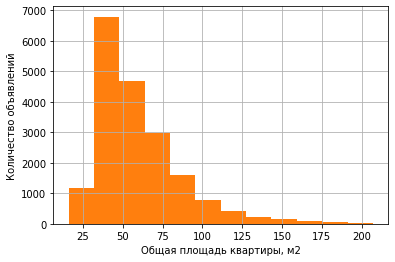

In [25]:
data['total_area'].hist(bins=12).set_xlabel('Общая площадь квартиры, м2')
data['total_area'].hist(bins=12).set_ylabel('Количество объявлений')
data['total_area'].describe()

#### Жилая площадь
Подавляющее большинство объектов недвижимости имеют жилую площадь от 20 до 45м2; медиана проходит на уровне 32м2, что соответствует одно- или двухкомнатной квартире. Также весомая часть приходится на объекты с жилой площадью 50 - 80м2 (порядка 7%) и небольшая на объекты до 110м2.


count    17389.000000
mean        33.618789
std         17.805060
min         10.080000
25%         18.500000
50%         30.100000
75%         42.800000
max        150.800000
Name: living_area, dtype: float64

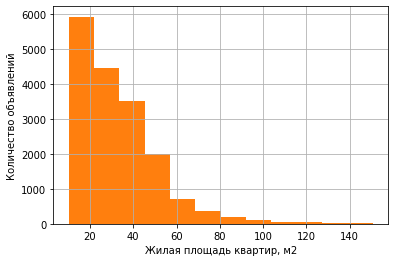

In [26]:
data['living_area'].hist(bins=12).set_xlabel('Жилая площадь квартир, м2')
data['living_area'].hist(bins=12).set_ylabel('Количество объявлений')
data['living_area'].describe()

#### Площадь кухни
Большая часть кухонь имеют площадь от 8 до 13 кв.м. Весомая доля приходится на кухни от 12 до 18 м2, далее с увеличением квадратуры количество стремится к нулю.

count    17060.000000
mean        10.717965
std          4.778758
min          4.100000
25%          8.000000
50%         10.000000
75%         12.000000
max         44.900000
Name: kitchen_area, dtype: float64

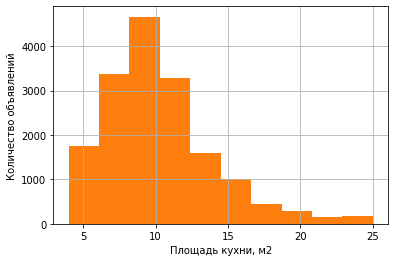

In [27]:
data['kitchen_area'].hist(range=(4, 25)).set_xlabel('Площадь кухни, м2')
data['kitchen_area'].hist(range=(4, 25)).set_ylabel('Количество объявлений')
data['kitchen_area'].describe()

#### Цена продажи
В среднем, разброс цен варьируется от 4 до 8 млн.руб; медиана проходит на уровне около 5,5 миллионов, а средняя цена по выборке - 7,5 млн, что показывает достаточно большое количество очень дорогих квартир

count    1.898700e+04
mean     6.158756e+06
std      4.715285e+06
min      5.200000e+05
25%      3.550000e+06
50%      4.840000e+06
75%      7.050000e+06
max      4.990000e+07
Name: last_price, dtype: float64

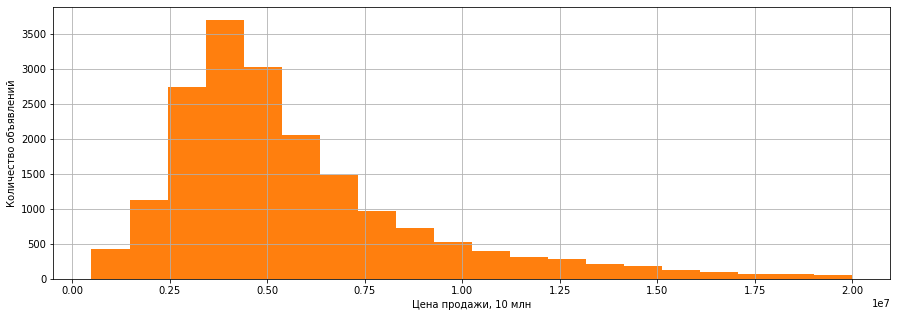

In [28]:
data['last_price'].hist(bins=20, range = (500000, 20000000), figsize=(15, 5)).set_xlabel('Цена продажи, 10 млн')
data['last_price'].hist(bins=20, range = (500000, 20000000), figsize=(15, 5)).set_ylabel('Количество объявлений')
data['last_price'].describe()

#### Количество комнат
Самый часто продаваемый объект недвижимости -  двухкомнатная квартира, с небольшим отставанием следуют однокомнатные квартиры, за ним - трёхкомнатные. Квартиры свыше четырёх комнат - редкость, хотя отдельные объекты и могут похвастаться девятнадцатью помещениями.

count    18987.000000
mean         2.033181
std          1.011393
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

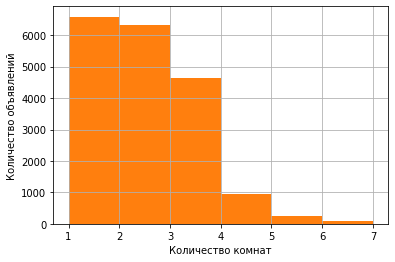

In [29]:
data['rooms'].hist(bins=6, range=(1, 7)).set_xlabel('Количество комнат')
data['rooms'].hist(bins=6, range=(1, 7)).set_ylabel('Количество объявлений')
data['rooms'].describe()

#### Высота потолка
Стандартная высота потолка - 2,7м, ощутимо реже встречаются квартиры с высотой потолков до 3,3м и уж совсем редко до 4м

count    10271.000000
mean         2.788899
std          0.258099
min          2.510000
25%          2.600000
50%          2.700000
75%          2.850000
max          4.800000
Name: ceiling_height, dtype: float64

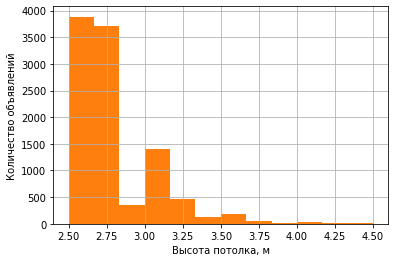

In [30]:
data['ceiling_height'].hist(bins=12, range=(2.5, 4.5)).set_xlabel('Высота потолка, м')
data['ceiling_height'].hist(bins=12, range=(2.5, 4.5)).set_ylabel('Количество объявлений')
data['ceiling_height'].describe()

#### Этаж
Подавляющее большинство объектов недвижимости располагаются на этажах от третьего до девятого.

count    18987.000000
mean         6.196714
std          5.102439
min          1.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

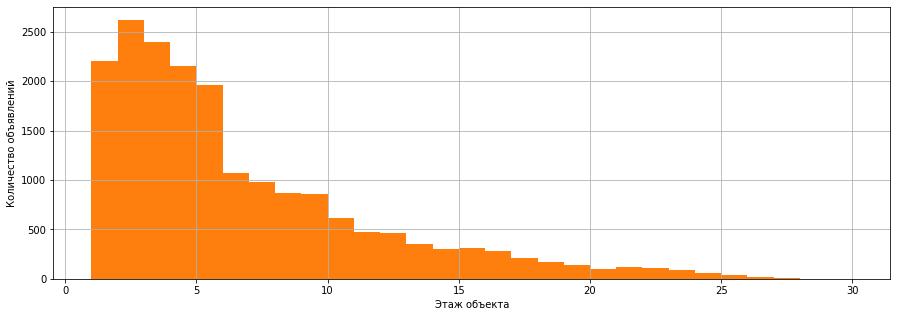

In [31]:
data['floor'].hist(bins=29, range=(1, 30), figsize=(15, 5)).set_xlabel('Этаж объекта')
data['floor'].hist(bins=29, range=(1, 30), figsize=(15, 5)).set_ylabel('Количество объявлений')
data['floor'].describe()

#### Тип этажа
Вполне естественно, что большая часть недвижимости продаётся на этажах, отличных от первого и последнего, однако количество объявлений о продаже квартир на последнем этаже немного больше.

count      18987
unique         3
top       другой
freq       14286
Name: floor_type, dtype: object

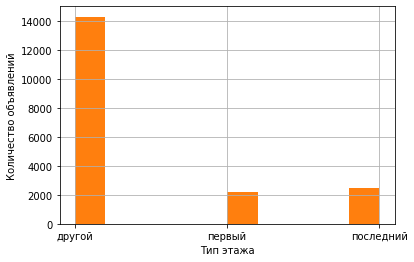

In [32]:
data['floor_type'].hist().set_xlabel('Тип этажа')
data['floor_type'].hist().set_ylabel('Количество объявлений')
data['floor_type'].describe()

#### Этажность дома
Большая часть домов имеют этажность от 5 до 16, что вполне соответствует застройке города. Медианное значение проходит на уровне девятиэтажки.

count    18987.000000
mean        11.361827
std          6.846099
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         52.000000
Name: floors_total, dtype: float64

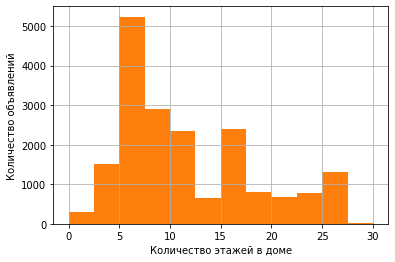

In [33]:
data['floors_total'].hist(bins=12, range=(0,30)).set_xlabel('Количество этажей в доме')
data['floors_total'].hist(bins=12, range=(0, 30)).set_ylabel('Количество объявлений')
data['floors_total'].describe()

#### Расстояние до центра города
Большая часть продаваемых объектов недвижимости находятся на удалении от 8 до 15 км от центра, квартиры в центре города представлены приблизительно 15% выборки.

count    14631.000000
mean        13.403922
std          7.257287
min          0.181000
25%          8.736000
50%         12.874000
75%         16.005000
max         39.936000
Name: to_city_center_km, dtype: float64

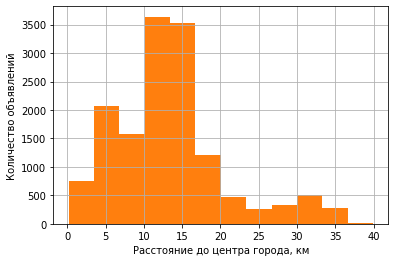

In [34]:
data['to_city_center_km'].hist(bins=12).set_xlabel('Расстояние до центра города, км')
data['to_city_center_km'].hist(bins=12).set_ylabel('Количество объявлений')
data['to_city_center_km'].describe()

#### Расстояние до аэропорта
Большая часть объектов недвижимости удалена от аэропортов на расстояние от 18 до 36ки.

count    14612.000000
mean     28109.125308
std      11838.391216
min          0.000000
25%      18625.000000
50%      26251.500000
75%      36361.000000
max      61748.000000
Name: airports_nearest, dtype: float64

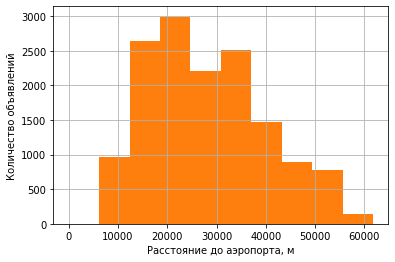

In [35]:
data['airports_nearest'].hist().set_xlabel('Расстояние до аэропорта, м')
data['airports_nearest'].hist().set_ylabel('Количество объявлений')
data['airports_nearest'].describe()

#### Расстояние до центра
В пределах пешей доступности почти всех объектов недвижимости имеется хотя бы один парк.

count    6453.000000
mean      497.598946
std       353.879924
min         1.000000
25%       288.000000
50%       456.000000
75%       618.000000
max      3190.000000
Name: parks_nearest, dtype: float64

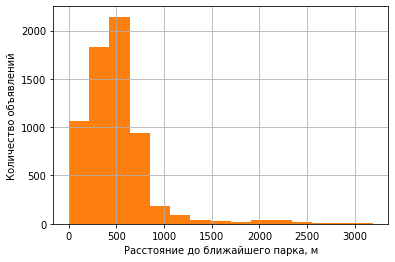

In [36]:
data['parks_nearest'].hist(bins=15).set_xlabel('Расстояние до ближайшего парка, м')
data['parks_nearest'].hist(bins=15).set_ylabel('Количество объявлений')
data['parks_nearest'].describe()

#### День подачи объявления
Чаще всего объявления дают в будни дни.

Text(0, 0.5, 'Количество объявлений')

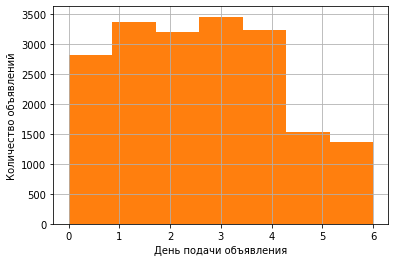

In [37]:
data['first_exposition_weekday'].hist(bins=7).set_xlabel('День подачи объявления')
data['first_exposition_weekday'].hist(bins=7).set_ylabel('Количество объявлений')

#### Месяц подачи объявления
Больше всего объявлений публикуются с февраля по апрель и в ноябре, а самые "холодные" месяцы - май, январь и декабрь.

Text(0, 0.5, 'Количество объявлений')

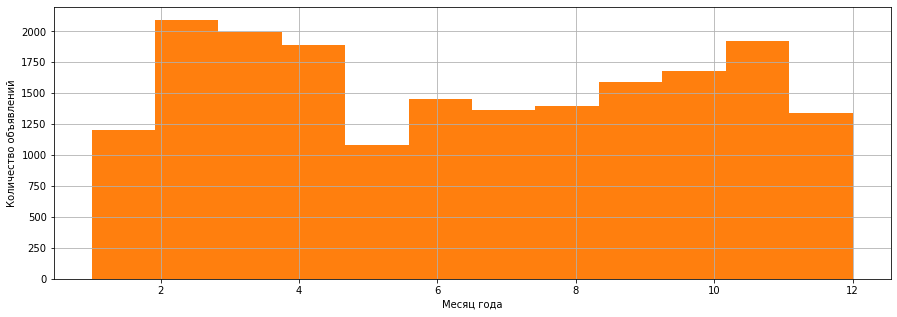

In [38]:
data['first_exposition_month'].hist(bins=12, figsize= (15,5)).set_xlabel('Месяц года')
data['first_exposition_month'].hist(bins=12, figsize= (15,5)).set_ylabel('Количество объявлений')

#### Продолжительность продажи
ПРиблизительно 70% объектов продавались в срок до полугода. Средняя продолжительность продажи как раз соответствует 190 дням, однако медиана проходит на уровне в 97 дней. Необычайно быстрыми можно считать продажи до 5 дней, необычайно медленными - от 3 до 5 лет.

count    16619.000000
mean       181.809194
std        220.019167
min          2.000000
25%         45.000000
50%         96.000000
75%        233.000000
max       1572.000000
Name: days_exposition, dtype: float64

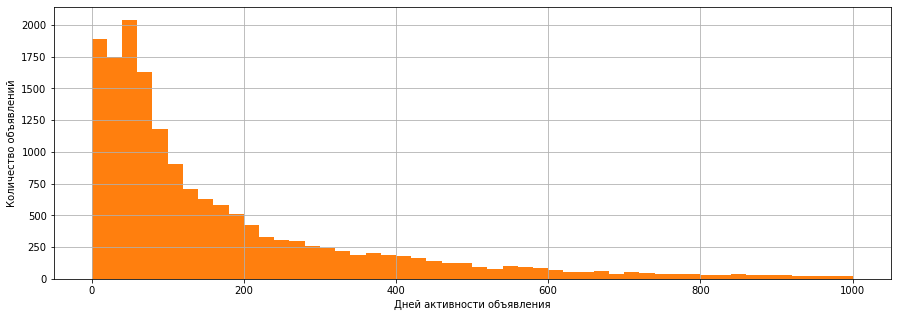

In [39]:
data['days_exposition'].hist(bins=50, range=(0, 1000), figsize=(15, 5)).set_xlabel('Дней активности объявления')
data['days_exposition'].hist(bins=50, range=(0, 1000), figsize=(15, 5)).set_ylabel('Количество объявлений')
data['days_exposition'].describe()

Text(0, 0.5, 'Количество объявлений')

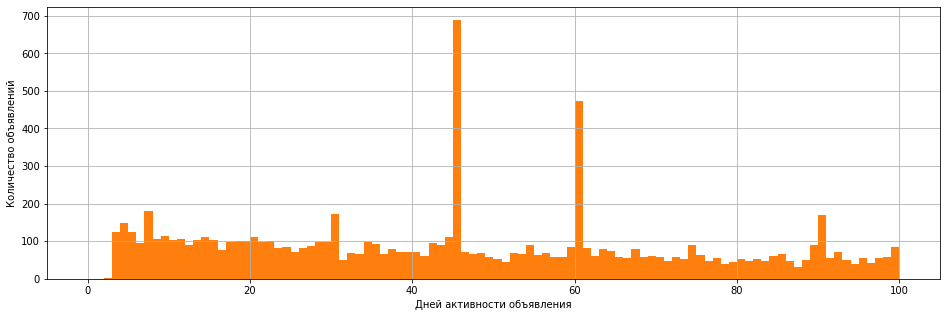

In [40]:
data['days_exposition'].hist(bins= 100, range= (0, 100), figsize=(16, 5)).set_xlabel('Дней активности объявления')
data['days_exposition'].hist(bins= 100, range= (0, 100), figsize=(16, 5)).set_ylabel('Количество объявлений')

### Факторы, влияющие на общую стоимость объекта

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

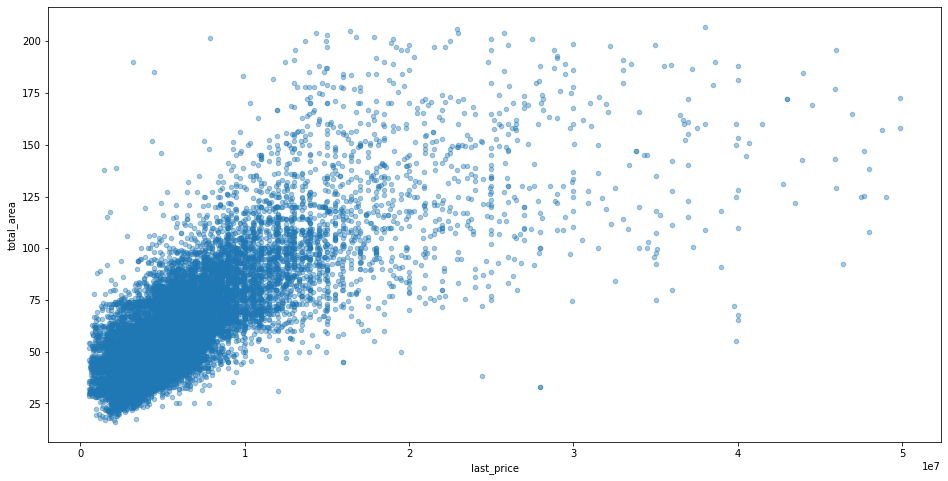

In [41]:
data.plot(x='last_price', y='total_area', kind='scatter', figsize=(16, 8), alpha=0.4)

In [42]:
data['last_price'].corr(data['total_area'])

0.7698733970146641

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

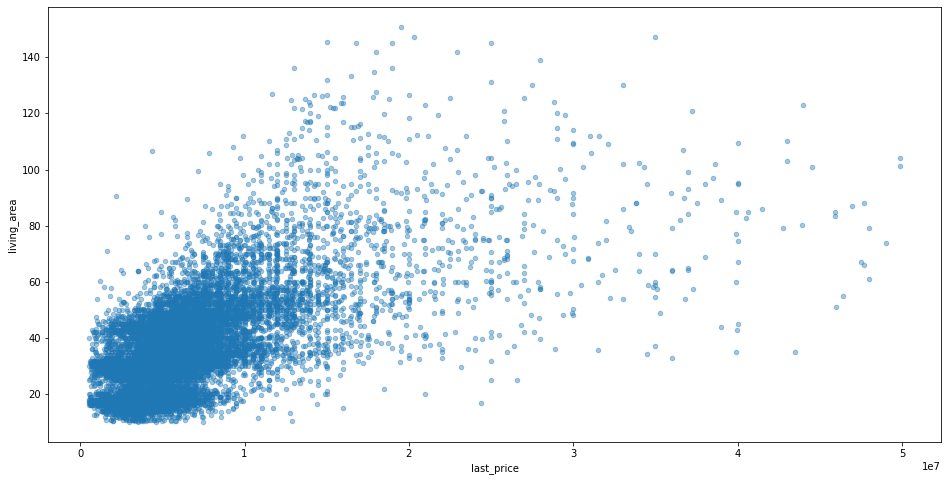

In [43]:
data.plot(x='last_price', y='living_area', kind='scatter', figsize=(16, 8), alpha=0.4)

In [44]:
data['last_price'].corr(data['living_area'])

0.6691195433713216

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

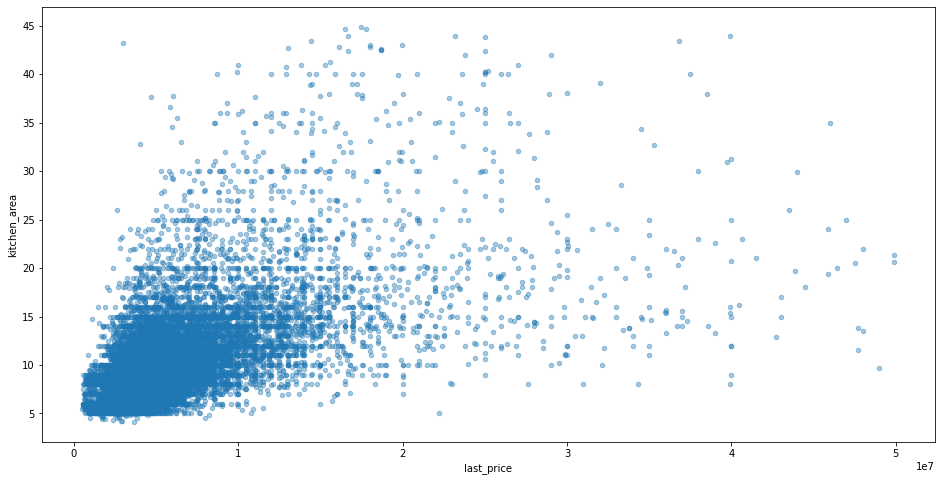

In [45]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', figsize=(16, 8), alpha=0.4)

In [46]:
data['last_price'].corr(data['kitchen_area'])

0.5640513128490391

<AxesSubplot:xlabel='rooms'>

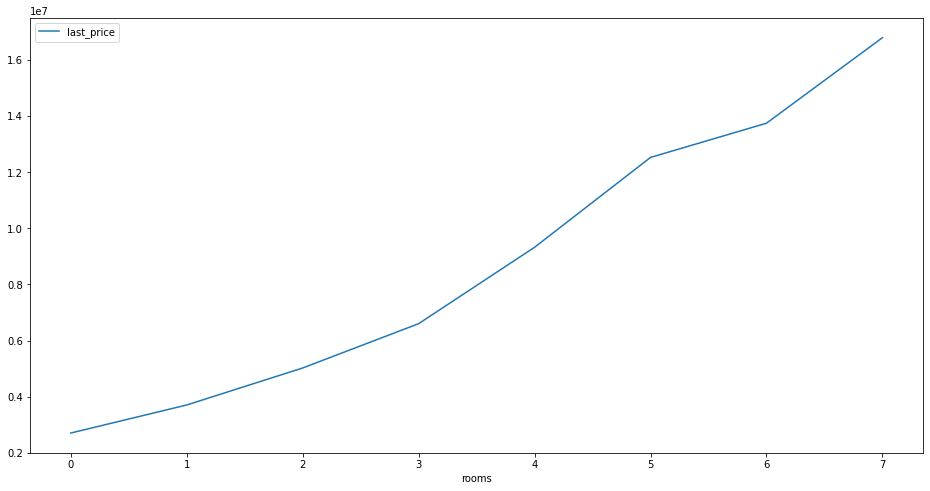

In [47]:
data_rooms_to_price = data.pivot_table(index='rooms', values='last_price', aggfunc='median')
data_rooms_to_price.plot(figsize=(16, 8))

In [48]:
data['last_price'].corr(data['rooms'])

0.4957116579956777

<AxesSubplot:xlabel='floor_type'>

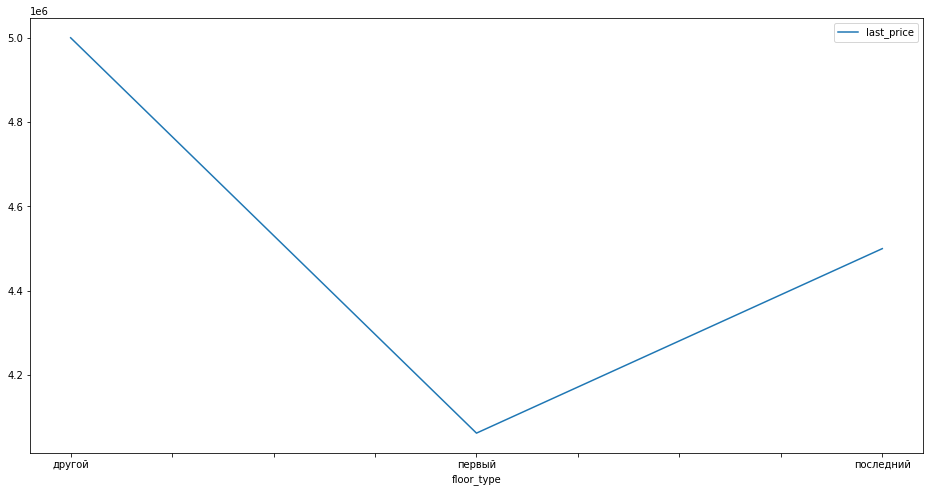

In [49]:
data_price_to_floor = data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
data_price_to_floor.plot(figsize=(16, 8))

<AxesSubplot:xlabel='first_exposition_weekday'>

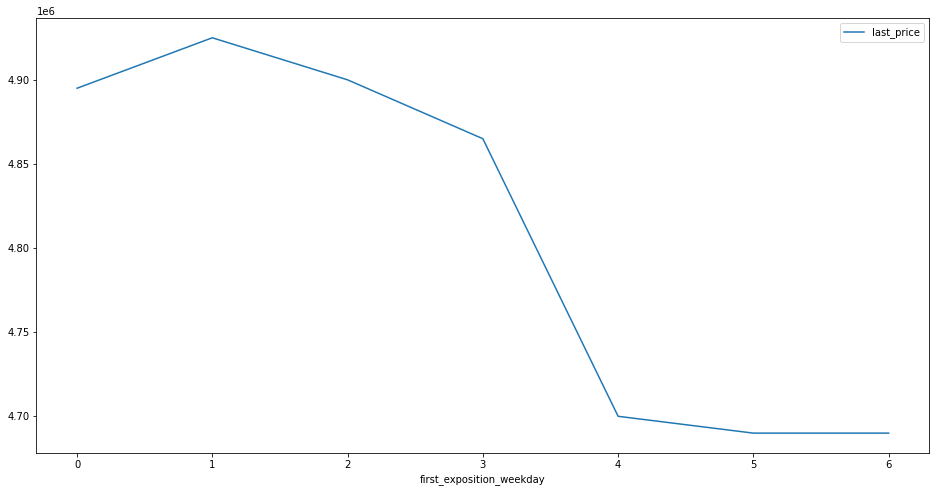

In [50]:
data_weekday_to_price = data.pivot_table(index='first_exposition_weekday', values='last_price', aggfunc='median')
data_weekday_to_price.plot(figsize=(16, 8))

<AxesSubplot:xlabel='first_exposition_month'>

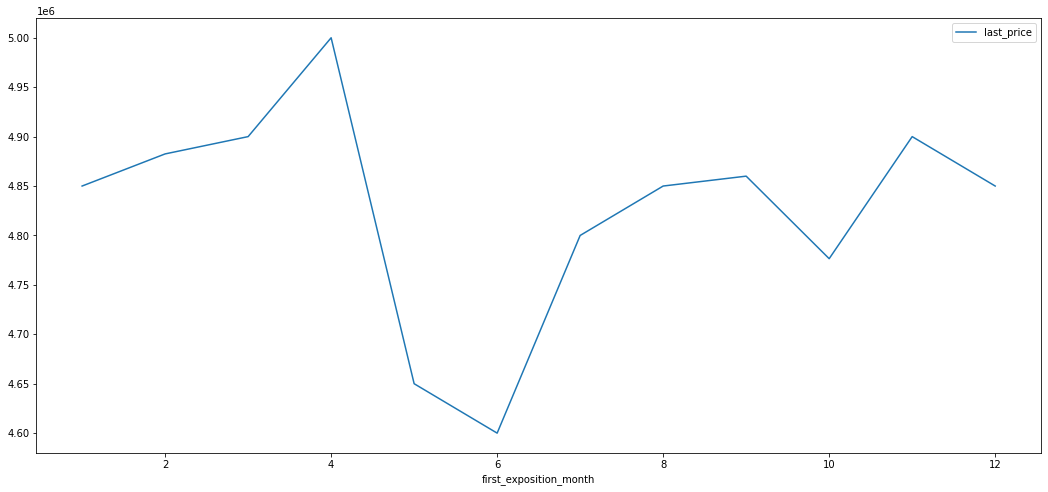

In [51]:
data_month_to_price = data.pivot_table(index='first_exposition_month', values='last_price', aggfunc='median')
data_month_to_price.plot(figsize=(18, 8))
#Как отобразить все месяцы?

In [52]:
# check
import numpy as np
import matplotlib.pyplot as plt

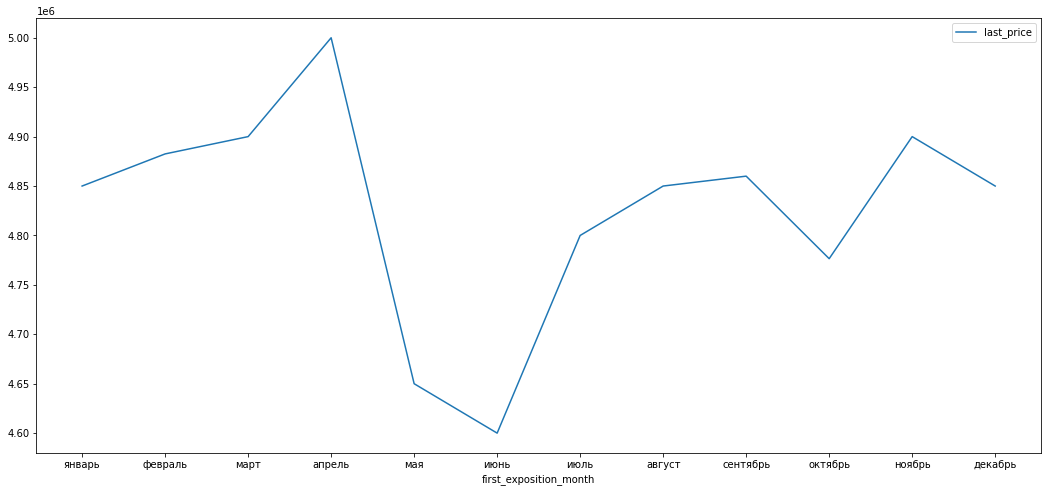

In [53]:
# check

data_month_to_price = data.pivot_table(index='first_exposition_month', values='last_price', aggfunc='median')

position = np.arange(12)
fig, ax = plt.subplots()

#  Устанавливаем позиции тиков:
ax.set_xticks(position+1)

#  Устанавливаем подписи тиков
ax.set_xticklabels(["январь", "февраль", "март", "апрель", "мая", 
                    "июнь", "июль", "август", "сентябрь", "октябрь", "ноябрь", "декабрь"])

ax = data_month_to_price.plot(figsize=(18, 8), ax = ax);


<AxesSubplot:xlabel='first_exposition_year'>

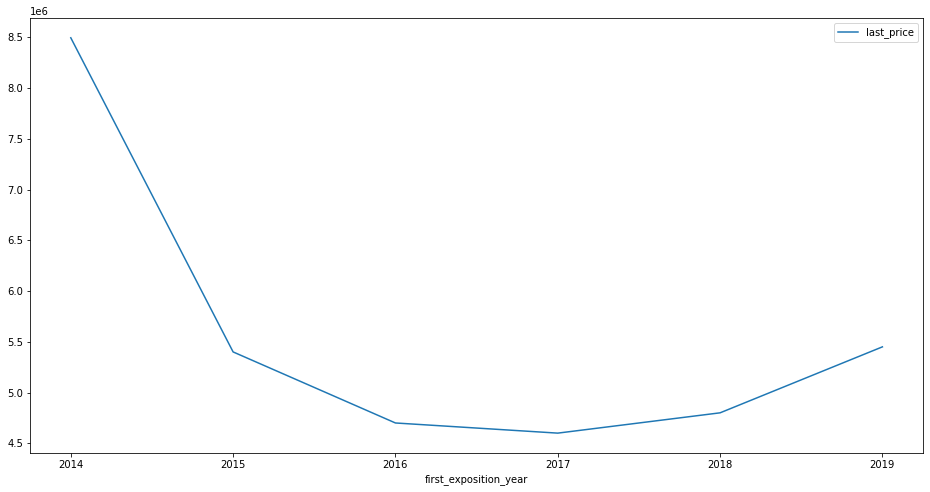

In [54]:
data_year_to_price = data.pivot_table(index='first_exposition_year', values='last_price', aggfunc='median')
data_year_to_price.plot(figsize=(16, 8))

In [55]:
data['last_price'].corr(data['first_exposition_year'])

-0.024722764438631268

#### Из иследованных факторов наибольшее влияние на цену квартиры оказывают площади: в порядке убывания влияния, общая, жилая, кухни. Также, в целом, цена квартиры на первом этаже меньше.

### Цена за один квадрат

По выборке видно, что все медианные и средние значения в выборке, в основном, диктует СПБ, где соответственно мы и наблюдаем самую высокую медианную цену квадрата недвижимости, на уровне 105 тысяч за единицу. Самый дешевый квадратный метр в топ-10 по количеству объявлений о продаже мы видим в Красном Селе, около 72 тысяч.

In [56]:
display(data.groupby('locality_name')['rooms'].count().sort_values(ascending=False))
list_pop = ['санкт-петербург', 'поселок шушары', 'поселок парголово', 'поселок парголово', 'пушкин', 'колпино', 'сестрорецк', 'красное село', 'петергоф', 'поселок металлострой']
data_most_popular = data.query('locality_name in @list_pop')
print(data_most_popular['price_m2'].median())
print(data_most_popular['price_m2'].mean())

locality_name
санкт-петербург           12882
поселок мурино              526
поселок шушары              406
всеволожск                  354
поселок парголово           309
                          ...  
поселок глебычево             1
поселок глажево               1
поселок гладкое               1
поселок высокоключевой        1
поселок жилпоселок            1
Name: rooms, Length: 299, dtype: int64

103000.0
110328.89701869631


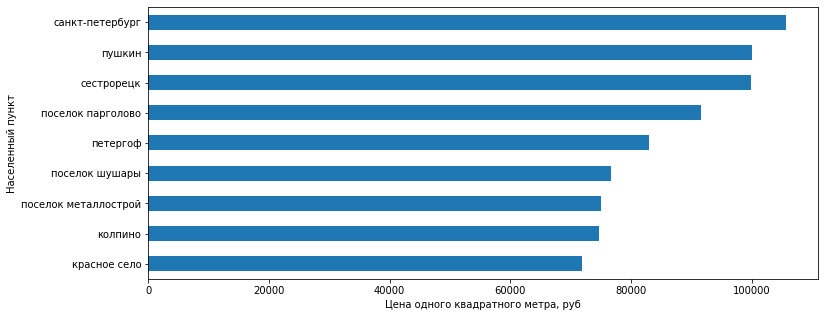

In [57]:
ax = data_most_popular.groupby('locality_name')['price_m2'].median().sort_values().round().plot(kind='barh',figsize=(12, 5));
ax.set_xlabel('Цена одного квадратного метра, руб');
ax.set_ylabel('Населенный пункт');

#### СПБ и недвижка и центр
Ничего нового, общая тенденция: чем ближе к центру - тем дороже. Но одновременно наблюдаются несколько скачков на удалении около 27 км, подозреваю, что это элитные поселки за городом.

In [58]:
data_spb = data.query('locality_name == "санкт-петербург"')
data_spb['to_city_center_km'] = data_spb['to_city_center_km'].round()

/tmp/ipykernel_369/3483992958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb['to_city_center_km'] = data_spb['to_city_center_km'].round()


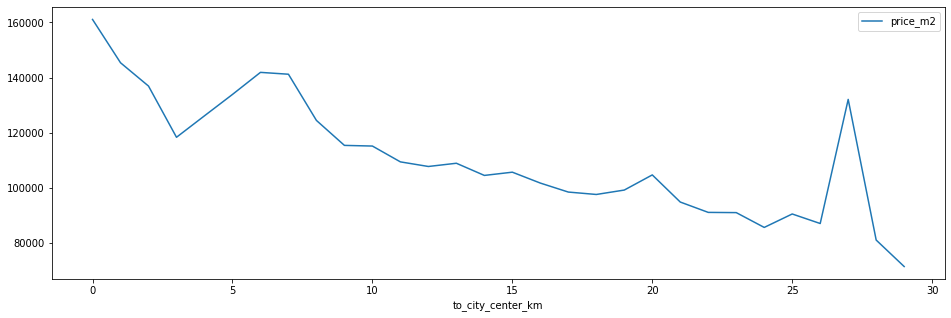

In [59]:
ax = data_spb.pivot_table(index='to_city_center_km', values='price_m2').plot(figsize = (16, 5
                                                    ));


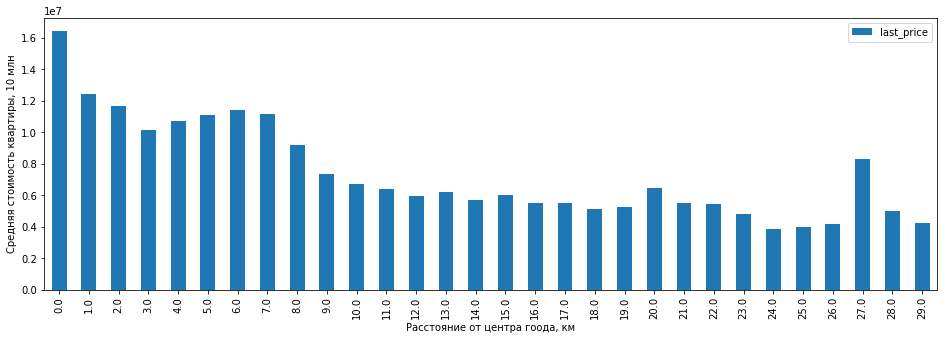

In [60]:
ax = data_spb.pivot_table(index='to_city_center_km', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(16,5));
ax.set_xlabel('Расстояние от центра гоода, км');
ax.set_ylabel('Средняя стоимость квартиры, 10 млн');

### Общий вывод

На входе были получены данные о продажах недвижимости в СПБ и области за период с 2014 по 2019 годы.
Было проведено исследование с целью определения факторов вляющих на цену объекта недвижимости.
Потенциальные факторы, влияющие на полную стоимость продажи:
   * общая площадь
   * жилая площадь
   * площадь кухни
   * количество комнат
   * тип этажа
   * дата размещения

В результате были выявлены зависимости от вышеупомянутых факторов.
1. Основополагающий фактор полной стоимости продажи - площадь помещения, причём наибольшее влияние оказывает полная площадь, а уже за ним следуют жилая и площадь кухни.
2. Соответственно, количество комнат, как связанная с площадью величина также имеет ощутимое влияние: с увеличением количества комнат, увеличивается и цена.
3. В ходе ислледования выявлено, что квартиры первого этажа стоят, в среднем, на 10% дешевле, что тоже соответствует расхожему мнению.
4. Существует странная взаимосвязь, что объявления, поданые в четверг, отличаются повышенной стоимостью недвижимости, по сравнению с остальной неделей.
5. Цена на недвижимость ощутимо падала с 2014 до 2017 года и только после пошла на небольшое повышение.

Также в результате исследования было определены ещё некоторые факты:
   * цена за квадратный метр в Санкт-Петербурге ожидаемо самая высокая, по сравнению с областью
   * большинство квартир продаётся в течение полугода с момента подачи объявления, хотя и наблюдаются отдельные случаи продажи в течение нескольких дней, как и случаи продаж годами. К последним относятся, в основном, объявления с неприлично высокой ценой.
   * цена за квадратный метр, в целом, ожидаемо, падает с удалением от центра, хотя и наблюдаются отдельные всплески, скорее всего благополучные спальные районы в городе и элитные дачные посёлки за его пределами.

В общем, исследование не может похвастаться какими-либо результатами, расходящимися с обывательским расхожим мнением о ценах на недвижимость, все существующие и прижившиеся стереотипы подтвердились:
   * дороже - в центре
   * дороже - больше площадь
   * дороже - в областном центре
   * хочешь сэкономить - бери на первом этаже
   * хочешь продать - запасись терпением.

In [61]:
# check
import seaborn as sns

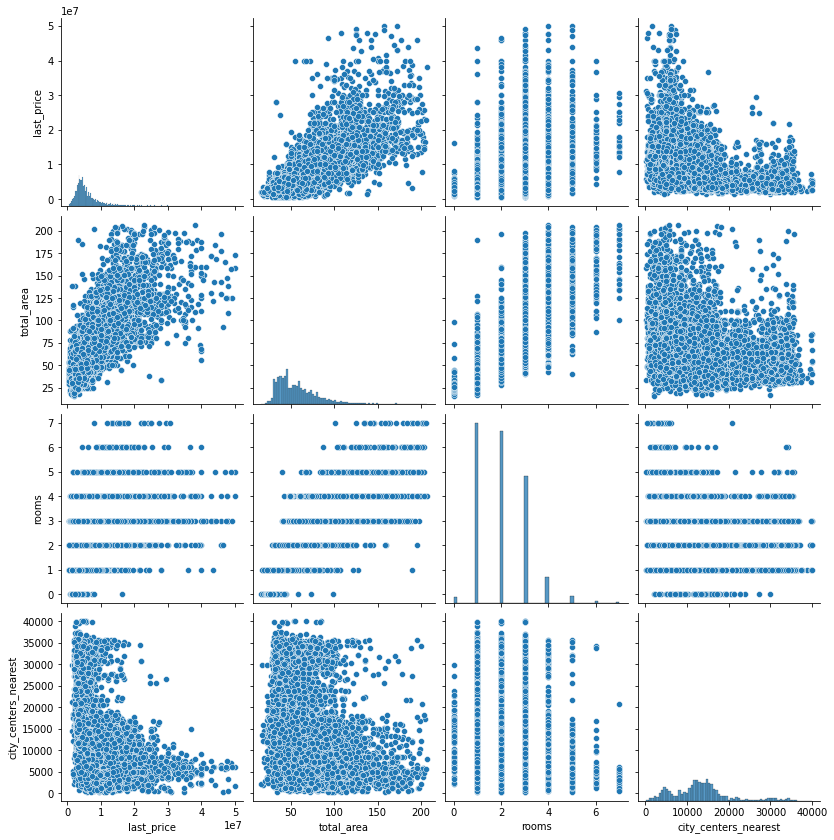

In [62]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'city_centers_nearest']])
plt.gcf().set_size_inches(12,12);


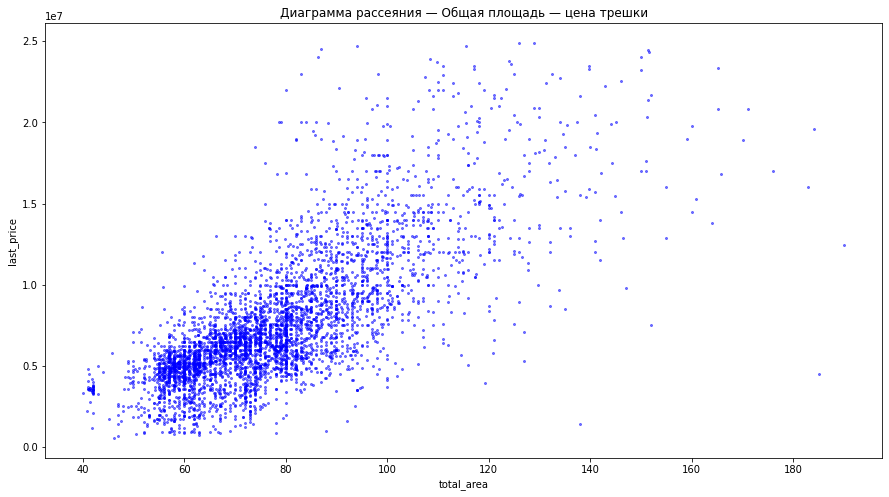

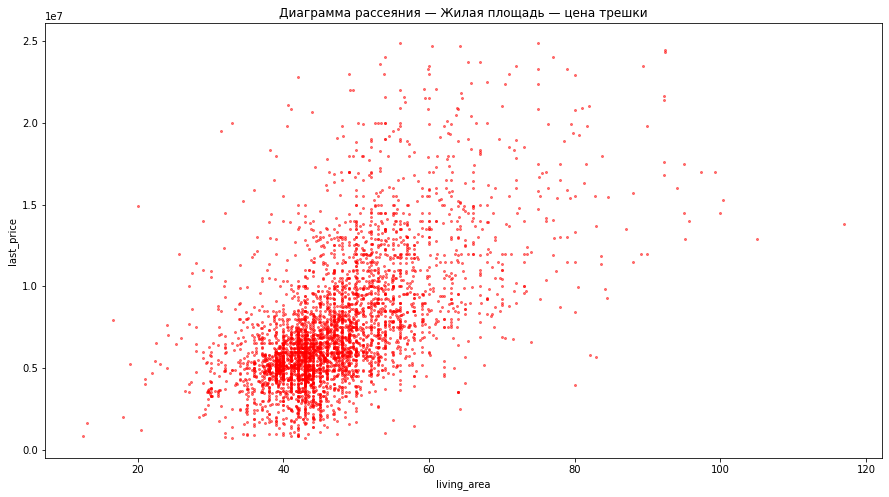

In [63]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод